## Exemplos de Algoritmos Não Supervisionado K-Means

In [79]:
import pandas as pd
import numpy as np
import random
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.cluster import KMeans
from sklearn import neighbors, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.layers import Input, Dense, Dropout, Activation
from tensorflow.keras.models import Model

In [26]:
# Dados aleatorios
x = [random.randint(1,100) for x in range(50)]
y = [random.randint(1,100) for x in range(50)]

dados = {
    'x': x,
    'y': y
}

In [27]:
# cria o dataframe
df = pd.DataFrame(dados)

In [28]:
kmeans = KMeans(n_clusters = 2) # cria o objeto para o k-mean encontrar 2 cluster
kmeans.fit(df) # aplico o algoritmo
centroides = kmeans.cluster_centers_  # encontra as coordenadas dos centroides
print(centroides)

[[67.9047619  30.33333333]
 [50.51724138 75.62068966]]


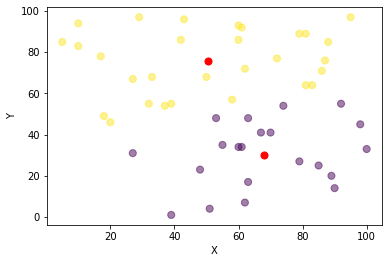

In [30]:
# realiza o plot do grafico de saida
plt.scatter(df['x'], df['y'], c = kmeans.labels_.astype(float), s = 50, alpha = 0.5)
plt.scatter(centroides[:,0], centroides[:,1], c = 'red', s = 50)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Exemplo Algoritmo Supervisionado KNN

In [32]:
# utilizando dataset iris
iris = datasets.load_iris()

In [34]:
# converte o dataset em dataframe
df_iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [35]:
# transforma os dados em array
x = df_iris.iloc[:, :-1].values  # dados de entrada
y = df_iris.iloc[:, 4].values    # dados de saida (target)

In [37]:
# realiza a divisão dos dados entre treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20) # separa 20% dos dados para teste

In [39]:
# realiza o processo de normalização dos dados
scaler = StandardScaler() # objeto que normaliza os dados
scaler.fit(x_train)       # realiza a normalização dos dados

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [41]:
# treina o modelo
classifier = KNeighborsClassifier(n_neighbors = 5) # utiliza a construção por meio de 5 vizinhos
classifier.fit(x_train, y_train)                   # aplica a classificação

KNeighborsClassifier()

In [43]:
# realiza a previsão
y_pred = classifier.predict(x_test)
print(y_pred)

[1. 0. 0. 0. 0. 0. 1. 0. 0. 2. 0. 2. 1. 0. 2. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 2. 2. 0.]


In [45]:
# cria a matriz de confusão para comparar o modelo criado
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[17  0  0]
 [ 0  7  1]
 [ 0  1  4]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       0.88      0.88      0.88         8
         2.0       0.80      0.80      0.80         5

    accuracy                           0.93        30
   macro avg       0.89      0.89      0.89        30
weighted avg       0.93      0.93      0.93        30



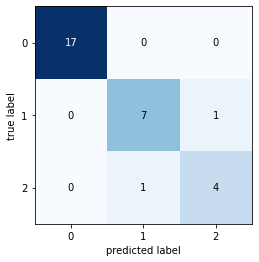

In [48]:
# realiza o plot da Matrix de Confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

## Exemplo Algortimo Supervisionado - Arvore de Decisao

In [52]:
# cria o objeto de classificacao
clf = DecisionTreeClassifier()

# realiza o treinamento do classificador
clf = clf.fit(x_train, y_train)

# realiza a previsao de classificacao
y_pred = clf.predict(x_test)

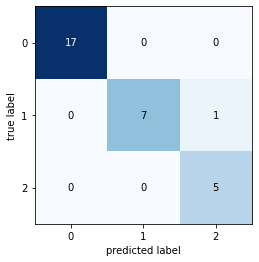

In [53]:
# Avaliando o Modelo
# realiza o plot da matriz de confusao
matriz_confusao = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(matriz_confusao)
plt.show()

## Exemplo Algoritmo Supervisionado - SVM

In [66]:
# criar o objeto de classificação
clf = SVC()

# realiza a classificaão via SVM
clf.fit(x_train, y_train)

# realiza a previsao
y_pred = clf.predict(x_test)

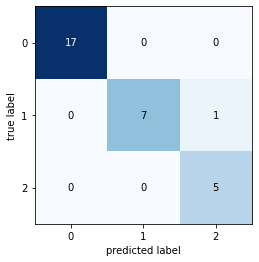

In [67]:
# Avaliando o Modelo
matriz_confusao = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(matriz_confusao)
plt.show()

## Exemplo Algoritmo - Rede Neural

In [75]:
# definie o objeto para classificação
clf = MLPClassifier(solver = 'lbfgs', hidden_layer_sizes = (5, 5), random_state = 1) # rede com escondidas com 5 neuronios cada

# realiza o fit do modelo
clf.fit(x_train, y_train)

# realiza previsão
y_pred = clf.predict(x_test)

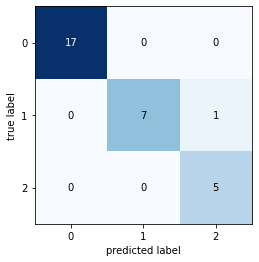

In [76]:
# avaliando o modelo
matriz_confusao = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(matriz_confusao)
plt.show()

## Exemplo com Deep Learning - TensorFlow

In [81]:
dataset = sns.load_dataset('iris')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [82]:
# dividindo entre Entrada e Saida
x = dataset.drop(['species'], axis = 1)
y = pd.get_dummies(dataset.species, prefix = 'output') # transforma cada uma das classes em vetor

In [84]:
x.head() # entradas

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [86]:
y.head() # saidas

,output_setosa,output_versicolor,output_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [87]:
# divide os dados entre treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [88]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [91]:
entrada = Input(shape = (x_train.shape[1],))
camada_1 = Dense(100, activation = 'relu')(entrada)
camada_2 = Dense(50, activation = 'relu')(camada_1)
camada_3 = Dense(25, activation = 'relu')(camada_2)
saida = Dense(y_train.shape[1], activation = 'softmax')(camada_3)

In [94]:
model = Model(inputs = entrada, outputs = saida) # define o modelo
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               500       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 78        
Total params: 6,903
Trainable params: 6,903
Non-trainable params: 0
_________________________________________________________________


In [95]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [96]:
# realizando o treinamento da nossa rede
history = model.fit(x_train, y_train, batch_size = 4, epochs = 20, verbose = 1, validation_split = 0.20)

Epoch 1/20
24/24 [==============================] - 1s 11ms/step - loss: 1.0248 - acc: 0.5505 - val_loss: 0.7682 - val_acc: 0.9167
Epoch 2/20
24/24 [==============================] - 0s 8ms/step - loss: 0.7732 - acc: 0.7998 - val_loss: 0.5173 - val_acc: 0.9167
Epoch 3/20
24/24 [==============================] - 0s 8ms/step - loss: 0.5353 - acc: 0.8302 - val_loss: 0.3348 - val_acc: 0.9167
Epoch 4/20
24/24 [==============================] - 0s 4ms/step - loss: 0.3601 - acc: 0.8409 - val_loss: 0.2359 - val_acc: 0.9167
Epoch 5/20
24/24 [==============================] - 0s 3ms/step - loss: 0.2931 - acc: 0.8700 - val_loss: 0.2162 - val_acc: 0.9167
Epoch 6/20
24/24 [==============================] - 0s 3ms/step - loss: 0.2265 - acc: 0.9254 - val_loss: 0.1722 - val_acc: 0.9167
Epoch 7/20
24/24 [==============================] - 0s 3ms/step - loss: 0.1655 - acc: 0.9209 - val_loss: 0.1732 - val_acc: 0.9583
Epoch 8/20
24/24 [==============================] - 0s 3ms/step - loss: 0.1259 - acc: 0.9

In [97]:
acuracia = model.evaluate(x_test, y_test, verbose = 1)
print('Acuracia do modelo: ', acuracia[1])

1/1 [==============================] - 0s 144ms/step - loss: 0.1532 - acc: 0.9333
Acuracia do modelo:  0.9333333373069763
